In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.utils.data import get_outliers_inliers
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

Data Preprocessing

In [2]:
aloi = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\aloi-unsupervised-ad.csv", header = None)

In [3]:
aloi

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.872812,0.000005,0.000000,0.000036,0.000000,0.000000,0.0,0.000000,0.000000,0.050327,...,0.014212,0.000104,0.0,0.025490,0.004937,0.000011,0.000054,0.006804,0.015385,o
1,0.975206,0.000000,0.000000,0.000651,0.000000,0.000000,0.0,0.000000,0.000000,0.007039,...,0.000000,0.000000,0.0,0.004853,0.001582,0.000000,0.000000,0.000201,0.000000,o
2,0.963777,0.000000,0.000000,0.002005,0.000000,0.000000,0.0,0.000000,0.000000,0.006642,...,0.000000,0.000000,0.0,0.007828,0.002523,0.000000,0.000393,0.003800,0.000000,o
3,0.973246,0.000000,0.000000,0.000556,0.000000,0.000000,0.0,0.000000,0.000000,0.008979,...,0.000000,0.000000,0.0,0.004392,0.000170,0.000000,0.000000,0.000007,0.000000,o
4,0.960720,0.000000,0.000000,0.000656,0.000000,0.000000,0.0,0.000000,0.000000,0.013319,...,0.000000,0.000000,0.0,0.010299,0.000561,0.000000,0.000084,0.000264,0.000000,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.967972,0.000319,0.000000,0.000520,0.000267,0.000002,0.0,0.000000,0.000000,0.000746,...,0.000000,0.000000,0.0,0.000043,0.000170,0.000002,0.000043,0.004716,0.004415,n
49996,0.974542,0.000472,0.000000,0.000723,0.000380,0.000007,0.0,0.000000,0.000000,0.000821,...,0.000000,0.000000,0.0,0.000038,0.000081,0.000000,0.000047,0.004734,0.001964,n
49997,0.980091,0.000671,0.000000,0.000845,0.000402,0.000011,0.0,0.000002,0.000000,0.000497,...,0.000000,0.000000,0.0,0.000054,0.000149,0.000000,0.000052,0.003603,0.002055,n
49998,0.981312,0.000830,0.000002,0.000285,0.000368,0.000041,0.0,0.000002,0.000005,0.000355,...,0.000000,0.000000,0.0,0.000106,0.000158,0.000029,0.000066,0.003493,0.002459,n


In [4]:
shuffled_df = aloi.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.976237,0.000000,0.000000,0.000070,0.000000,0.000000,0.0,0.000000,0.000000,0.014574,...,0.000005,0.000000,0.0,0.003194,0.000199,0.000000,0.000052,0.000131,0.000000,n
1,0.903479,0.000622,0.000000,0.004465,0.000439,0.000000,0.0,0.000000,0.000000,0.004935,...,0.000000,0.000000,0.0,0.000000,0.002062,0.000034,0.000000,0.006714,0.021238,n
2,0.831172,0.000081,0.000000,0.001906,0.000314,0.000000,0.0,0.000000,0.000000,0.025013,...,0.000574,0.000070,0.0,0.010521,0.001892,0.000210,0.027857,0.008807,0.040534,n
3,0.920878,0.003741,0.000000,0.000185,0.035093,0.002871,0.0,0.000088,0.014355,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000441,n
4,0.974641,0.000267,0.000005,0.003126,0.000868,0.000002,0.0,0.000018,0.000002,0.000260,...,0.000000,0.000002,0.0,0.000005,0.000097,0.000084,0.000005,0.000712,0.001655,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.958268,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.018792,...,0.000000,0.000000,0.0,0.003303,0.004921,0.000000,0.000002,0.007654,0.000023,n
49996,0.860092,0.000011,0.000000,0.000136,0.000151,0.000000,0.0,0.000000,0.000000,0.054604,...,0.000000,0.000002,0.0,0.018726,0.005608,0.000009,0.000278,0.010326,0.003040,n
49997,0.955108,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000936,...,0.000000,0.000000,0.0,0.001833,0.001634,0.000000,0.006187,0.016353,0.006847,n
49998,0.975299,0.000194,0.000000,0.001049,0.000389,0.000000,0.0,0.000000,0.000000,0.004230,...,0.000757,0.000000,0.0,0.001831,0.000350,0.000081,0.006264,0.000427,0.000488,n


In [5]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.976237,0.000000,0.000000,0.000070,0.000000,0.000000,0.0,0.000000,0.000000,0.014574,...,0.000000,0.000005,0.000000,0.0,0.003194,0.000199,0.000000,0.000052,0.000131,0.000000
1,0.903479,0.000622,0.000000,0.004465,0.000439,0.000000,0.0,0.000000,0.000000,0.004935,...,0.000002,0.000000,0.000000,0.0,0.000000,0.002062,0.000034,0.000000,0.006714,0.021238
2,0.831172,0.000081,0.000000,0.001906,0.000314,0.000000,0.0,0.000000,0.000000,0.025013,...,0.001992,0.000574,0.000070,0.0,0.010521,0.001892,0.000210,0.027857,0.008807,0.040534
3,0.920878,0.003741,0.000000,0.000185,0.035093,0.002871,0.0,0.000088,0.014355,0.000000,...,0.022287,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000441
4,0.974641,0.000267,0.000005,0.003126,0.000868,0.000002,0.0,0.000018,0.000002,0.000260,...,0.000179,0.000000,0.000002,0.0,0.000005,0.000097,0.000084,0.000005,0.000712,0.001655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.958268,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.018792,...,0.000000,0.000000,0.000000,0.0,0.003303,0.004921,0.000000,0.000002,0.007654,0.000023
49996,0.860092,0.000011,0.000000,0.000136,0.000151,0.000000,0.0,0.000000,0.000000,0.054604,...,0.000075,0.000000,0.000002,0.0,0.018726,0.005608,0.000009,0.000278,0.010326,0.003040
49997,0.955108,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000936,...,0.000000,0.000000,0.000000,0.0,0.001833,0.001634,0.000000,0.006187,0.016353,0.006847
49998,0.975299,0.000194,0.000000,0.001049,0.000389,0.000000,0.0,0.000000,0.000000,0.004230,...,0.000011,0.000757,0.000000,0.0,0.001831,0.000350,0.000081,0.006264,0.000427,0.000488


In [7]:
from sklearn.decomposition import PCA


In [8]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

8


In [9]:
pca = PCA(n_components=8)
new_df = pca.fit_transform(df)

In [10]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7
0,-0.079902,-0.004247,-0.002063,-0.001723,-0.004423,-0.000093,0.000647,-0.001066
1,-0.003287,0.022555,0.002141,0.021836,0.007308,0.010831,-0.007679,-0.011048
2,0.073874,0.010315,0.008481,-0.004302,-0.009459,0.003583,0.014620,-0.011072
3,-0.029426,0.003626,0.007419,0.003259,0.016234,0.003735,0.008274,0.010078
4,-0.079112,0.006802,0.006057,0.004326,0.002654,-0.001003,0.000872,-0.005973
...,...,...,...,...,...,...,...,...
49995,-0.061176,-0.006728,-0.001530,0.001367,-0.006520,-0.004432,-0.002148,0.003075
49996,0.042730,-0.034612,0.001028,0.012308,-0.028254,-0.002975,0.009290,-0.008910
49997,-0.057822,0.008366,0.011268,-0.001158,-0.001286,-0.011783,-0.002712,0.002091
49998,-0.079695,0.001891,0.005450,-0.002231,0.002002,-0.000595,0.001428,-0.002634


Base case of Algorithms (PyOD) on the dataset

In [11]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [12]:
lof = LOF()
cof = COF()
cblof = CBLOF()
knn = KNN()

In [13]:
lof.fit(df)

LOF(algorithm='auto', contamination=0.1, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [14]:
cblof.fit(df)

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [15]:
knn.fit(df)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [16]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [17]:
y

,27
0,0
1,0
2,0
3,0
4,0
...,...
49995,0
49996,0
49997,0
49998,0


In [18]:
lof_pred = lof.labels_
lof_scores = lof.decision_scores_

In [19]:
cblof_pred = cblof.labels_
cblof_scores = cblof.decision_scores_

In [20]:
knn_pred = knn.labels_
knn_scores = knn.decision_scores_

In [21]:
lof_accuracy = accuracy_score(y,lof_pred)
print(lof_accuracy)

0.88824


In [22]:
lof_f1 = f1_score(y, lof_pred)
print(f"F1-score: {lof_f1:.2f}")

F1-score: 0.14


In [23]:
roc_auc = roc_auc_score(y, lof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.73


In [24]:
lof_fpr, lof_tpr, _ = roc_curve(y, lof_scores)


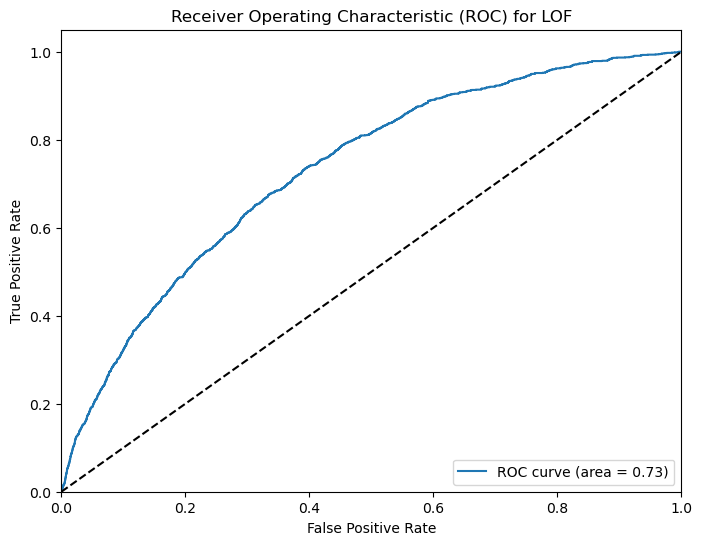

In [25]:
plt.figure(figsize=(8, 6))
plt.plot(lof_fpr, lof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for LOF')
plt.legend(loc="lower right")
plt.show()

In [26]:
cblof_accuracy = accuracy_score(y,cblof_pred)
print(cblof_accuracy)

0.8786


In [27]:
cblof_f1 = f1_score(y,cblof_pred)
print(f"F1: {cblof_f1:.2f}")

F1: 0.07


In [28]:
roc_auc = roc_auc_score(y, cblof_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.54


In [29]:
cblof_fpr, cblof_tpr, _ = roc_curve(y, cblof_scores)

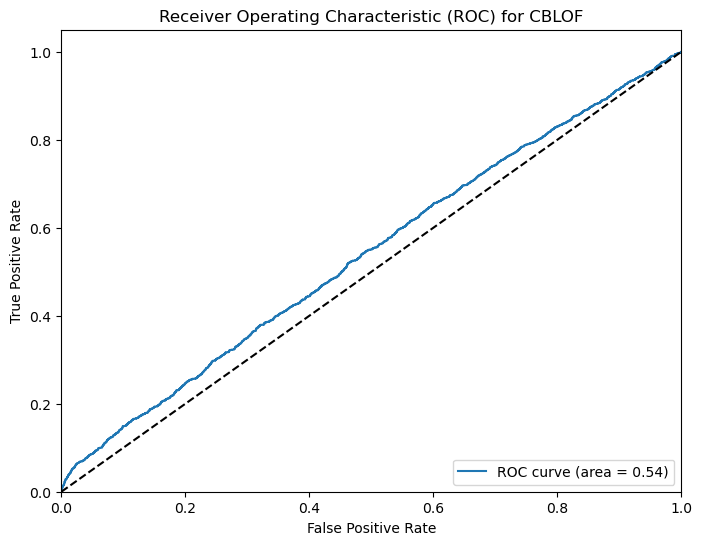

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(cblof_fpr, cblof_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for CBLOF')
plt.legend(loc="lower right")
plt.show()

In [31]:
knn_accuracy = accuracy_score(y,knn_pred)
print(knn_accuracy)

0.886


In [32]:
knn_f1 = f1_score(y,knn_pred)
print(f"F1: {knn_f1:.2f}")

F1: 0.12


In [33]:
roc_auc = roc_auc_score(y, knn_scores)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.68


In [34]:
knn_fpr, knn_tpr, _ = roc_curve(y, knn_scores)


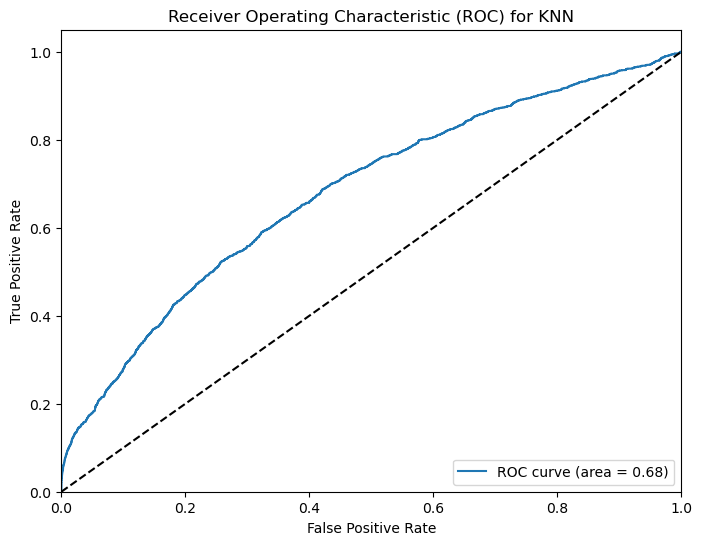

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(knn_fpr, knn_tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for KNN')
plt.legend(loc="lower right")
plt.show()

Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

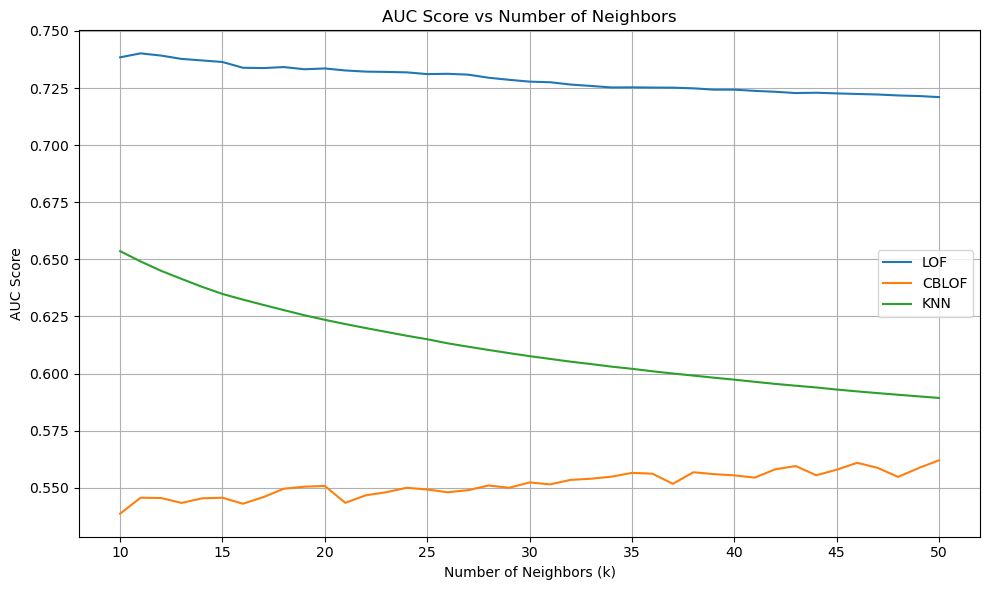

In [36]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
n_neighbors_list = list(range(10, 51))

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    auc_lof = roc_auc_score(y, y_scores_lof)
    auc_scores_lof.append(auc_lof)
    
    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    auc_cblof = roc_auc_score(y, y_scores_cblof)
    auc_scores_cblof.append(auc_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    auc_knn = roc_auc_score(y, y_scores_knn)
    auc_scores_knn.append(auc_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)

plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)

KNN auc 0.6119242202363557
LOF auc 0.7288989906265868
CBLOF auc 0.5516892135500491


In [39]:
from emmv import emmv_scores

lof_emmv = emmv_scores(lof,df)
print('lof emmv',lof_emmv['em'])

lof emmv 0.005307202000000001


In [40]:
cblof_emmv = emmv_scores(cblof,df)
print('cblof emmv',cblof_emmv['em'])

cblof emmv 0.005049802000000001


In [41]:
knn_emmv = emmv_scores(knn,df)
print('knn emmv',knn_emmv['em'])

knn emmv 0.005037922000000001
